In [ ]:
import numpy as np
import pandas as pd
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_excel('ORDER_RECIPE1.xls')
df

,ORDER_ID,COMPARTMENT_ID,ORDER_RECIPE_ID,BAY_CODE,API_CODE,INJECTOR_PRESET_CODE,TARE_SCALE_INTERFACE_CODE,TANK_CODE,PRODUCT_GROUP_CODE,INJECTOR_CODE,...,COMPARTMENT_CONTAINER_TYPE,COMPARTMENT_NUMBER,PDXR_LOADING_REF,BLEND_CORRECTION_METHOD,BLEND_CORRECTION_NET_VOLUME,TOTAL_BATCH_BLEND_NET_VOLUME,BLEND_CORRECTION_SOURCE,COMMODITY_GROUP,DERIVATION_STATUS,DERIVED_VALUES_ERROR
0,8320,8342,8343,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
1,8320,8344,8345,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
2,8320,8346,8347,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
3,8320,8348,8349,BAY_300,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
4,8320,8350,8351,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,389752,389780,390107,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65531,389752,389782,389783,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65532,389752,389782,390308,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65533,389786,389806,389807,BAY_400,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN


In [ ]:
"""df0 = pd.read_csv('ORDER_RECIPE_TOTAL.csv')
df0"""

"df0 = pd.read_csv('ORDER_RECIPE_TOTAL.csv')\ndf0"

In [ ]:
fassakh=df.isnull().sum()
print(fassakh[fassakh > 0])

BAY_CODE                           3208
INJECTOR_PRESET_CODE              49626
TARE_SCALE_INTERFACE_CODE         65535
TANK_CODE                          3208
INJECTOR_CODE                     49626
METER_CODE                        19117
SHOST_SI_HOST_PRODUCT_NUMBER      65535
THOST_TI_HOST_PRODUCT_NUMBER      65535
LAST_USER_NAME                    65530
LAST_MODIFIED                     65530
START_TIME                           72
END_TIME                             72
HOST_PRODUCT_CODE                 65535
HOST_PRODUCT_NAME                 65535
FINAL_SCALE_INTERFACE_CODE        65535
PETROEX_COMPONENT_PRODUCT_CODE    65535
REDUCED_PRODUCT_NUMBER            65535
VRU_CODE                          65535
PDXR_PRODUCT_CODE                 65535
PDXR_ADDITIVE_CODE                65535
METER_PRESET_CODE                 19117
COMPARTMENT_OWNER_ID               3208
COMPARTMENT_CONTAINER_CODE         3208
COMPARTMENT_CONTAINER_TYPE         3208
COMPARTMENT_NUMBER                65530


In [ ]:
df1 = df.drop(['COMPARTMENT_ID','PDXR_AUTHORIZATION_UNITS','MEASURED_QUANTITY_TYPE','COMMITTED_CONV_COE','COMMITTED_CONV_PRESSURE',
               'INVENTORY_QUANTITY_TYPE','DERIVED_VALUES_DIRECTIVE','ADJUSTMENT_BATCH','COMMODITY_GROUP','CALCULATE_NET',
               'DERIVATION_STATUS','TOTAL_BATCH_BLEND_NET_VOLUME','PRESSURE','NON_RECIPE_WEIGHT_IN_VAC','BLEND_CORRECTION_METHOD',
               'BLEND_CORRECTION_NET_VOLUME','BLEND_CORRECTION_SOURCE','ORDER_ID','ORDER_RECIPE_ID','API_CODE','HOST_PRODUCT_CODE',
               'PDXR_ADDITIVE_CODE','PDXR_PRODUCT_CODE','REDUCED_PRODUCT_NUMBER','INJECTOR_PRESET_CODE','INJECTOR_CODE','BAY_CODE',
               'HOST_PRODUCT_NAME','PETROEX_COMPONENT_PRODUCT_CODE','FINAL_SCALE_INTERFACE_CODE','TARE_SCALE_INTERFACE_CODE','TANK_CODE',
               'METER_CODE','SHOST_SI_HOST_PRODUCT_NUMBER','THOST_TI_HOST_PRODUCT_NUMBER','LAST_MODIFIED','LAST_USER_NAME','METER_PRESET_CODE',
               'COMPARTMENT_OWNER_ID','COMPARTMENT_CONTAINER_CODE','COMPARTMENT_CONTAINER_TYPE','COMPARTMENT_NUMBER','PDXR_LOADING_REF',
               'DERIVED_VALUES_ERROR','BLEND_PERCENT','VRU_CODE','RT_INJECTOR_ALARM_COUNT','RATE','OVERRIDE_TEMPERATURE_ENABLE',
               'COMMITTED_WEIGHT_IN_AIR','COMMITTED_WEIGHT_IN_VAC','COMPATIBILITY_STATUS','NON_RECIPE_WEIGHT','BLEND_PERCENT',
               'COMMITTED_CONV_DENSITY','ADDITIVE_WEIGHT_IN_VAC','PRODUCT_WEIGHT_IN_VAC','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY',
               'NON_RECIPE_GROSS_QUANTITY','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY','NON_RECIPE_GROSS_QUANTITY','RECIPE_CORRECTION_TYPE',
               'COMPATIBILITY_STATUS','ADDITIVE_MASKING','CUSTOMER_NET_QUANTITY','DENSITY','NET_QUANTITY','WEIGHT','PRODUCT_TOLERANCE_STATUS',
               'SPECIFIC_GRAVITY','COEFFICIENT_EXPANSION','TEMPERATURE','RVP','PRODUCT_TOLERANCE_STATUS','TANK_INVENTORY_UPDATED','TOTALIZER_UPDATED',
               'FLUSH_STATUS','ADDITIVE_WEIGHT','PRODUCT_WEIGHT','BATCH_NUMBER','FRAC_END_GROSS_TOTALIZER','START_GROSS_TOTALIZER','END_GROSS_TOTALIZER',
               'START_NET_TOTALIZER','FROM_LEFT_ON_TRUCK','OBSERVED_DENSITY','COMPONENT_ID','CALCULATE_SECONDARY_UNITS','FRAC_START_GROSS_TOTALIZER',
               'TERMINAL_PRODUCT_TYPE','END_WEIGHT','START_WEIGHT','END_NET_TOTALIZER','OXYGEN','GROSS_QUANTITY','TERMINAL_PRODUCT_NUMBER','COMMITTED_CONV_TEMPERATURE',
               'COMMITTED_GROSS_QUANTITY','COMMITTED_NET_QUANTITY','END_TIME','SUPPLIER_NUMBER','ADDITIVE_QUANTITY','PRODUCT_QUANTITY'], axis=1)

In [ ]:
df1['PRODUCT_GROUP_CODE'].unique()

array(['DSL', 'GAS', 'ADD'], dtype=object)

In [ ]:
print(df1.isnull().any()> 0)

PRODUCT_GROUP_CODE    False
ORDERED_QUANTITY      False
START_TIME             True
dtype: bool


In [ ]:
df1 = df1[df1['ORDERED_QUANTITY'] != 0]

In [ ]:
df1['START_TIME'].value_counts().sort_values(ascending = False)

START_TIME
2021-10-28 03:04:29    1034
2021-10-27 07:00:19     708
2021-10-22 06:39:55     666
2021-11-24 02:06:37     651
2021-10-23 04:44:25     606
                       ... 
2021-11-30 08:09:25       1
2021-11-30 08:12:50       1
2021-11-30 08:12:12       1
2021-11-30 08:06:49       1
2021-11-09 15:48:05       1
Name: count, Length: 39382, dtype: int64

In [ ]:
# Forward Fill: fill missing dates with the last observed value
df1['START_TIME'] = df1['START_TIME'].fillna(method='ffill')

In [ ]:
"""grp=df1['PRODUCT_GROUP_CODE']
# change the PRODUCT_GROUP_CODE column
grp1 = grp.replace({ 'DSL' : 0, 'ADD' : 1 ,'GAS': 2})
# put the new PRODUCT_GROUP_CODE column back
df1['PRODUCT_GROUP_CODE']=grp1"""

"grp=df1['PRODUCT_GROUP_CODE']\n# change the PRODUCT_GROUP_CODE column\ngrp1 = grp.replace({ 'DSL' : 0, 'ADD' : 1 ,'GAS': 2})\n# put the new PRODUCT_GROUP_CODE column back\ndf1['PRODUCT_GROUP_CODE']=grp1"

In [ ]:
prod = 'DSL'
df1 = df1[df1['PRODUCT_GROUP_CODE'].str.upper() == prod.upper()]
df1

,PRODUCT_GROUP_CODE,ORDERED_QUANTITY,START_TIME
0,DSL,100,NaT
1,DSL,100,NaT
2,DSL,100,NaT
3,DSL,671,2021-09-24 14:21:46
4,DSL,100,2021-09-24 14:21:46
...,...,...,...
65529,DSL,4000,2021-12-17 14:43:36
65530,DSL,4000,2021-12-17 14:48:04
65531,DSL,10000,2021-12-17 14:50:18
65532,DSL,10000,2021-12-17 14:59:36


In [ ]:
print(df1.isnull().any()> 0)

PRODUCT_GROUP_CODE    False
ORDERED_QUANTITY      False
START_TIME             True
dtype: bool


In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1 = df1.dropna(subset=['START_TIME'])
df1

,PRODUCT_GROUP_CODE,ORDERED_QUANTITY,START_TIME
3,DSL,671,2021-09-24
4,DSL,100,2021-09-24
5,DSL,100,2021-09-24
6,DSL,100,2021-09-24
7,DSL,8000,2021-09-24
...,...,...,...
65529,DSL,4000,2021-12-17
65530,DSL,4000,2021-12-17
65531,DSL,10000,2021-12-17
65532,DSL,10000,2021-12-17


In [ ]:
df1 = df1.drop(['PRODUCT_GROUP_CODE'], axis=1)

In [ ]:
df1 = df1.groupby('START_TIME').sum().reset_index()
df1

,START_TIME,ORDERED_QUANTITY
0,2021-09-24,26971
1,2021-09-27,1619200
2,2021-09-28,4260300
3,2021-09-29,4260100
4,2021-09-30,4899200
...,...,...
77,2021-12-13,3016000
78,2021-12-14,2812200
79,2021-12-15,3047200
80,2021-12-16,3469637


In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1.set_index('START_TIME', inplace=True)
"""df1=df1.loc[datetime.date(year=2021,month=12,day=1):]"""

'df1=df1.loc[datetime.date(year=2021,month=12,day=1):]'

In [ ]:
df1

,ORDERED_QUANTITY
START_TIME,
2021-09-24,26971
2021-09-27,1619200
2021-09-28,4260300
2021-09-29,4260100
2021-09-30,4899200
...,...
2021-12-13,3016000
2021-12-14,2812200
2021-12-15,3047200


In [ ]:
# normalize the data_set
sc = MinMaxScaler(feature_range = (0, 1))
df1 = sc.fit_transform(df1)

In [ ]:
# split into train and test sets
train_size = int(len(df1) * 0.70)
test_size = len(df1) - train_size
train, test = df1[0:train_size, :], df1[train_size:len(df1), :]

In [ ]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 8
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=128))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='Adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 100, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr, early_stopping],shuffle=False)

Epoch 1/100
4/4 [==============================] - 8s 492ms/step - loss: 0.2611 - val_loss: 0.0601 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0745 - val_loss: 0.0946 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0667 - val_loss: 0.0492 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0715 - val_loss: 0.0449 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0610 - val_loss: 0.0578 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 0s 46ms/step - loss: 0.0646 - val_loss: 0.0553 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0573 - val_loss: 0.0425 - lr: 0.0010
Epoch 8/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0578 - val_loss: 0.0429 - lr: 0.0010
Epoch 9/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0511 - val_loss: 0.0464 - lr: 0.0010


In [ ]:
"""# create and fit the LSTM network regressor = Sequential()
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 1000, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)"""

"# create and fit the LSTM network regressor = Sequential()\nregressor = Sequential()\n\nregressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))\nregressor.add(Dropout(0.1))\n\nregressor.add(LSTM(units = 60, return_sequences = True))\nregressor.add(Dropout(0.1))\n\nregressor.add(LSTM(units = 60))\nregressor.add(Dropout(0.1))\n\nregressor.add(Dense(units = 1))\n\nregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')\nreduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)\nhistory =regressor.fit(X_train, Y_train, epochs = 1000, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)"

In [ ]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [ ]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

Train Mean Absolute Error: 939116.484375
Train Root Mean Squared Error: 1225637.0451486844
Test Mean Absolute Error: 675800.34375
Test Root Mean Squared Error: 1097979.6942164924


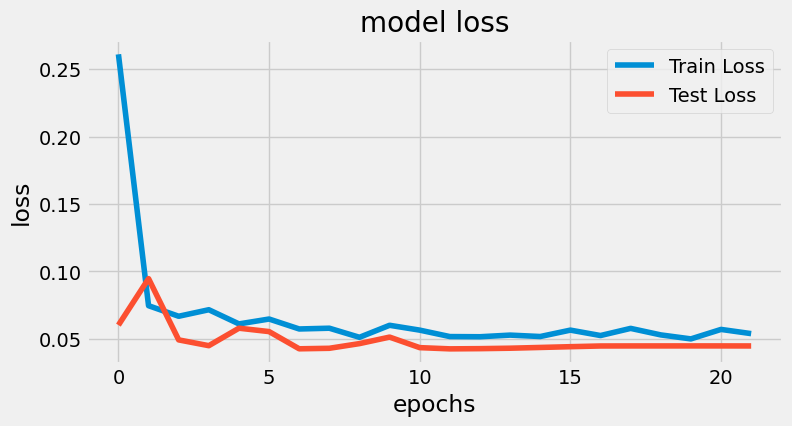

In [ ]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

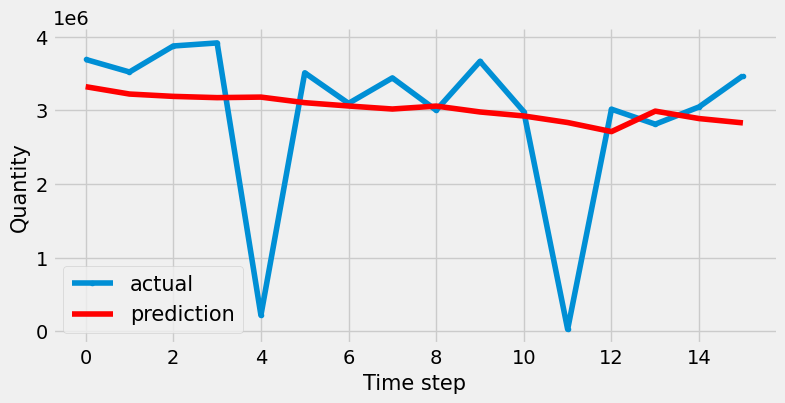

In [ ]:
#Compare Actual vs. Prediction
aa=[x for x in range(16)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:16], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:16], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Quantity', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();